In [1]:
import pandas as pd 
import numpy as np
import sklearn
import sklearn.linear_model 
import sklearn.metrics 
import sklearn.preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
df_trimestral = pd.read_excel("JPM.xlsx", skiprows=3)
df_hs =pd.read_excel("jpm_d_p.xlsx", skiprows=6) 
print(df_hs)
df_hs['Date'] = pd.to_datetime(df_hs['Date'])

df_hs['5_day_average'] = df_hs['PX_LAST'].rolling(window=5).mean()
print(df_trimestral)
df_hs.columns

           Date  PX_LAST  Change  % Change  PX_BID  Change.1  % Change.1
0    2025-02-21   264.24   -2.56 -0.959520  264.18     -2.68   -1.004272
1    2025-02-20   266.80  -12.45 -4.458371  266.86    -12.44   -4.453992
2    2025-02-19   279.25   -0.70 -0.250045  279.30     -0.62   -0.221492
3    2025-02-18   279.95    3.36  1.214794  279.92      3.39    1.225907
4    2025-02-14   276.59    0.27  0.097713  276.53      0.23    0.083243
...         ...      ...     ...       ...     ...       ...         ...
1248 2020-03-05   113.97     NaN       NaN  114.00       NaN         NaN
1249 2020-03-04   119.85     NaN       NaN  119.86       NaN         NaN
1250 2020-03-03   116.96     NaN       NaN  116.94       NaN         NaN
1251 2020-03-02   121.52     NaN       NaN  121.52       NaN         NaN
1252 2020-02-28   116.11     NaN       NaN  116.05       NaN         NaN

[1253 rows x 7 columns]
   In Millions of USD except Per Share                    Unnamed: 1  \
0                     12 Mo

Index(['Date', 'PX_LAST', 'Change', '% Change', 'PX_BID', 'Change.1',
       '% Change.1', '5_day_average'],
      dtype='object')

In [2]:
import pandas as pd

# 1. Load historical data (df_hs)
df_hs = pd.read_excel("jpm_d_p.xlsx", skiprows=6)
df_hs['Date'] = pd.to_datetime(df_hs['Date'], errors='coerce')
df_hs = df_hs.dropna(subset=['Date'])
df_hs = df_hs.sort_values(by='Date')
df_hs = df_hs[~df_hs['Date'].duplicated(keep='first')]
df_hs.set_index('Date', inplace=True)

# Add Year column to df_hs
df_hs['Year'] = df_hs.index.year

# 2. Load trimestral data
df_trimestral = pd.read_excel("JPM.xlsx", skiprows=3)
df_trimestral.columns = ['Metric', 'Description', 'FY_2018', 'FY_2019', 'FY_2020',
                         'FY_2021', 'FY_2022', 'FY_2023', 'FY_2024',
                         'Last_12M', 'FY_2025_Est', 'FY_2026_Est']
df_trimestral = df_trimestral.drop('Description', axis=1)
df_trimestral = df_trimestral.dropna(subset=['Metric'])
df_trimestral = df_trimestral.set_index('Metric')

# 3. Transpose trimestral data
df_trimestral_transposed = df_trimestral.transpose()

# Add Year column to df_trimestral_transposed
df_trimestral_transposed['Year'] = df_trimestral_transposed.index.map(lambda x: int(x.split('_')[1][:4]) if x != 'Last_12M' else 2025)

# 4. Define the list of metrics to extract
metrics_to_extract = [
    'Net Revenue',
    'Net Interest Income Less Provisions',
    'Net Revenue - Net of Commissions Paid',
    'Total Revenue',
    'Operating Margin',
    'Pretax Margin',
    'Profit Margin',
    'T12 Net Interest Margin',
    'Sales per Employee',
    'Dividends per Share',
    'Total Cash Common Dividends',
    'Pre-Tax Pre-Provision Profit',
    'Efficiency Ratio',
    'Actual Loan Losses (Net)',
    'Reinvested Earnings'
]

# 5. Filter df_trimestral_transposed to include only the desired metrics
df_trimestral_filtered = df_trimestral_transposed[metrics_to_extract + ['Year']]

# 6. Merge df_hs with df_trimestral_filtered
df_merged = pd.merge(df_hs, df_trimestral_filtered, on='Year', how='left')

import pandas as pd

# Assuming df_hs and df_trimestral are already loaded and prepared

# List of metrics to add
metrics_to_add = [
    'Net Revenue',
    'Net Interest Income Less Provisions',
    'Net Revenue - Net of Commissions Paid',
    'Total Revenue',
    'Operating Margin',
    'Pretax Margin',
    'Profit Margin',
    'T12 Net Interest Margin',
    'Sales per Employee',
    'Dividends per Share',
    'Total Cash Common Dividends',
    'Pre-Tax Pre-Provision Profit',
    'Efficiency Ratio',
    'Actual Loan Losses (Net)',
    'Reinvested Earnings'
]

# Ensure that metrics_to_add list has no duplicate values
metrics_to_add = list(set(metrics_to_add))

# 1. Add the new columns to df_hs, initialized with NaN
for metric in metrics_to_add:
    if metric not in df_hs.columns:
        df_hs[metric] = None # The problem is there, because is calling non exisiting data

# 2. Forward fill the new columns, check if the data already has data before
for metric in metrics_to_add:
    df_hs[metric] = df_hs[metric].ffill()
# Print the first few rows to verify
print(df_hs.head())

for i in range(len(df_hs)): 
    for j in range(len(df_trimestral_transposed)):
        if df_hs['Year'][i] == df_trimestral_transposed['Year'][j]:
            for g in df_trimestral_transposed.columns:
                for c in df_hs.columns:
                    if c == g:
                        df_hs[g][i] = df_trimestral_transposed[g][j]

            PX_LAST  Change  % Change  PX_BID  Change.1  % Change.1  Year  \
Date                                                                        
2020-02-28   116.11     NaN       NaN  116.05       NaN         NaN  2020   
2020-03-02   121.52     NaN       NaN  121.52       NaN         NaN  2020   
2020-03-03   116.96     NaN       NaN  116.94       NaN         NaN  2020   
2020-03-04   119.85     NaN       NaN  119.86       NaN         NaN  2020   
2020-03-05   113.97     NaN       NaN  114.00       NaN         NaN  2020   

           Dividends per Share Total Revenue Operating Margin  ...  \
Date                                                           ...   
2020-02-28                None          None             None  ...   
2020-03-02                None          None             None  ...   
2020-03-03                None          None             None  ...   
2020-03-04                None          None             None  ...   
2020-03-05                None          

C:\Users\capod\AppData\Local\Temp\ipykernel_1848\3294200043.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_hs['Year'][i] == df_trimestral_transposed['Year'][j]:
C:\Users\capod\AppData\Local\Temp\ipykernel_1848\3294200043.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_hs[g][i] = df_trimestral_transposed[g][j]
C:\Users\capod\AppData\Local\Temp\ipykernel_1848\3294200043.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [3]:
df_hs

PX_LAST  Change  % Change  PX_BID  Change.1  % Change.1  Year  \
Date                                                                        
2020-02-28   116.11     NaN       NaN  116.05       NaN         NaN  2020   
2020-03-02   121.52     NaN       NaN  121.52       NaN         NaN  2020   
2020-03-03   116.96     NaN       NaN  116.94       NaN         NaN  2020   
2020-03-04   119.85     NaN       NaN  119.86       NaN         NaN  2020   
2020-03-05   113.97     NaN       NaN  114.00       NaN         NaN  2020   
...             ...     ...       ...     ...       ...         ...   ...   
2025-02-14   276.59    0.27  0.097713  276.53      0.23    0.083243  2025   
2025-02-18   279.95    3.36  1.214794  279.92      3.39    1.225907  2025   
2025-02-19   279.25   -0.70 -0.250045  279.30     -0.62   -0.221492  2025   
2025-02-20   266.80  -12.45 -4.458371  266.86    -12.44   -4.453992  2025   
2025-02-21   264.24   -2.56 -0.959520  264.18     -2.68   -1.004272  2025   

           Dividends per Share Total Revenue Operating Margin  ...  \
Date                                                           ...   
2020-02-28                 3.6        129911          30.7876  ...   
2020-03-02                 3.6        129911          30.7876  ...   
2020-03-03                 3.6        129911          30.7876  ...   
2020-03-04                 3.6        129911          30.7876  ...   
2020-03-05                 3.6        129911          30.7876  ...   
...                        ...           ...              ...  ...   
2025-02-14               5.215    175633.154        45.281802  ...   
2025-02-18               5.215    175633.154        45.281802  ...   
2025-02-19               5.215    175633.154        45.281802  ...   
2025-02-20               5.215    175633.154        45.281802  ...   
2025-02-21               5.215    175633.154        45.281802  ...   

           Total Cash Common Dividends Reinvested Earnings Pretax Margin  \
Date                                                                       
2020-02-28                       11119            17309.85       30.7876   
2020-03-02                       11119            17309.85       30.7876   
2020-03-03                       11119            17309.85       30.7876   
2020-03-04                       11119            17309.85       30.7876   
2020-03-05                       11119            17309.85       30.7876   
...                                ...                 ...           ...   
2025-02-14                         0.0                   0     39.044886   
2025-02-18                         0.0                   0     39.044886   
2025-02-19                         0.0                   0     39.044886   
2025-02-20                         0.0                   0     39.044886   
2025-02-21                         0.0                   0     39.044886   

           Profit Margin Net Revenue Pre-Tax Pre-Provision Profit  \
Date                                                                
2020-02-28       25.0201      119951                        54410   
2020-03-02       25.0201      119951                        54410   
2020-03-03       25.0201      119951                        54410   
2020-03-04       25.0201      119951                        54410   
2020-03-05       25.0201      119951                        54410   
...                  ...         ...                          ...   
2025-02-14     29.322048  175633.154                          NaN   
2025-02-18     29.322048  175633.154                          NaN   
2025-02-19     29.322048  175633.154                          NaN   
2025-02-20     29.322048  175633.154                          NaN   
2025-02-21     29.322048  175633.154                          NaN   

           Efficiency Ratio Actual Loan Losses (Net) T12 Net Interest Margin  \
Date                                                                           
2020-02-28          54.4501                     5259

In [4]:
df_trimestral_transposed.drop 

<bound method DataFrame.drop of Metric      12 Months Ending Net Revenue + Net Interest Income  \
FY_2018           12/31/2018      109029                 55059   
FY_2019           12/31/2019      115720                 57245   
FY_2020           12/31/2020      119951                 54563   
FY_2021           12/31/2021      121649                 52311   
FY_2022           12/31/2022      129531                 66710   
FY_2023           12/31/2023      158384                 89267   
FY_2024           12/31/2024      177800                 92583   
Last_12M          12/31/2024      177800                 92583   
FY_2025_Est       12/31/2025  175633.154                   NaN   
FY_2026_Est       12/31/2026  181750.154                   NaN   

Metric        + Total Interest Income     + Interest Income  \
FY_2018                         77442                 58074   
FY_2019                         84040                 63462   
FY_2020                         64523               

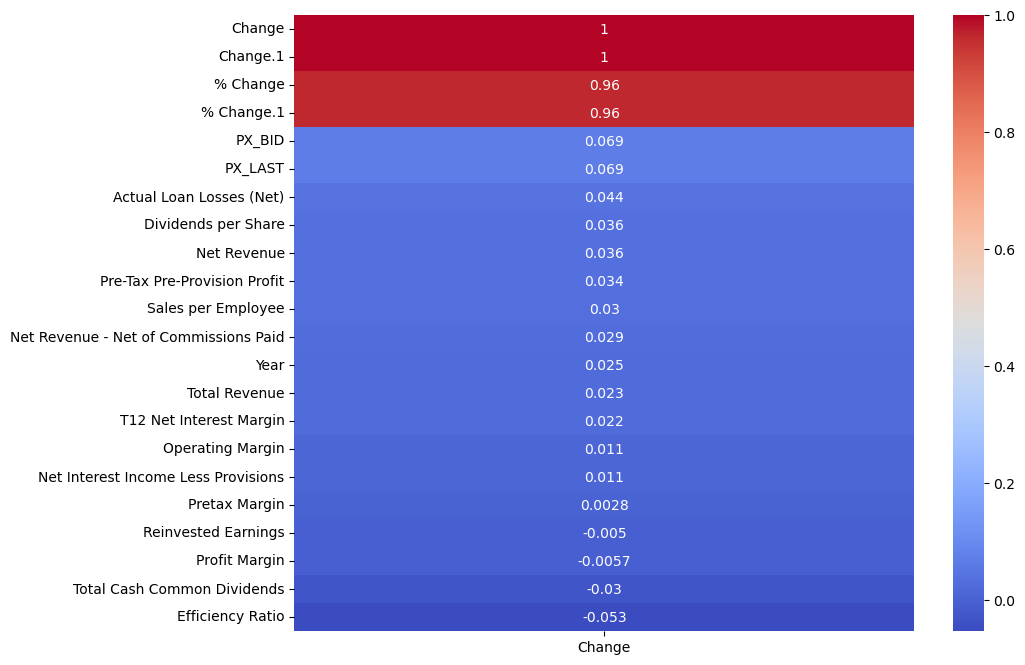

In [5]:
corr_matrix = df_hs.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Change']].sort_values(by='Change', ascending=False), annot=True, cmap='coolwarm')
plt.show()
import pandas as pd

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Ensure 'Change' column exists and is numeric
if 'Change' not in df_hs.columns:
    raise ValueError("'Change' column not found in df_hs")

df_hs['Change'] = pd.to_numeric(df_hs['Change'], errors='coerce')

# Exclude 'mask_%Chg' column from dataset
X = df_hs.drop(columns=['Change', '% Change', 'Change.1','% Change.1'], errors='ignore')  # Exclude both Change (target) and mask_%Chg if exists
y = df_hs['Change']  # Target

# Fill NaN values with 0
X = X.fillna(0)
y = y.fillna(0)

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Step 1: Compute correlation matrix
corr_matrix = df_hs.corr()
low_corr_threshold = 0.005  # Define a threshold for correlation

high_corr_features = corr_matrix.index[abs(corr_matrix['Change']) >= low_corr_threshold]
low_corr_features = corr_matrix.index[abs(corr_matrix['Change']) < low_corr_threshold]

# Remove target variable from the feature selection
high_corr_features = [col for col in high_corr_features if col in X.columns]
low_corr_features = [col for col in low_corr_features if col in X.columns]

# Separate high and low correlation features
X_high_corr = X[high_corr_features]
X_low_corr = X[low_corr_features]

# **Fix NaN issue before PCA**
X_high_corr = X_high_corr.fillna(0)
X_low_corr = X_low_corr.fillna(0)

# Step 2: Apply PCA to the low-correlation features
if not X_low_corr.empty:
    scaler = StandardScaler()  # Standardize the low-correlation features for PCA
    X_low_corr_scaled = scaler.fit_transform(X_low_corr)
    
    # Perform PCA keeping 95% of the variance
    pca = PCA(n_components=0.85)
    X_low_corr_pca = pca.fit_transform(X_low_corr_scaled)
else:
    X_low_corr_pca = np.empty((X.shape[0], 0))  # Empty array with correct row count

# Step 3: Combine high-correlation features with PCA components
if not X_high_corr.empty:
    X_combined = np.hstack((X_high_corr.values, X_low_corr_pca))
else:
    X_combined = X_low_corr_pca

# **Fix NaN issue in X_combined before model fitting**
if np.isnan(X_combined).any():
    raise ValueError("NaN values detected in X_combined. Check data preprocessing steps.")

# Step 4: Split into training and testing sets
if X_combined.size == 0 or X_combined.shape[0] == 0:
    raise ValueError("X_combined is empty after preprocessing. Check data filtering steps.")

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Step 5: Apply Polynomial Features
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 6: Fit the model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Step 7: Make predictions
train_poly_pred = poly_reg_model.predict(X_train_poly)
test_poly_pred = poly_reg_model.predict(X_test_poly)

# Step 8: Calculate metrics
train_mse_poly = mean_squared_error(y_train, train_poly_pred)
test_mse_poly = mean_squared_error(y_test, test_poly_pred)
train_r2_poly = r2_score(y_train, train_poly_pred)
test_r2_poly = r2_score(y_test, test_poly_pred)

# Step 9: Store results
results = {
    'Polynomial Linear': {
        'Train MSE': train_mse_poly,
        'Test MSE': test_mse_poly,
        'Train R²': train_r2_poly,
        'Test R²': test_r2_poly
    }
}

print(results)


{'Polynomial Linear': {'Train MSE': 4.940975892320194, 'Test MSE': 6.714409867539693, 'Train R²': 0.007241252105373963, 'Test R²': -0.05014970319146461}}


In [90]:
import xgboost as xgb

# Step 1: Fit the model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xg_model.fit(X_train, y_train)

# Step 2: Predictions
train_xg_pred = xg_model.predict(X_train)
test_xg_pred = xg_model.predict(X_test)

# Step 3: Calculate metrics
train_mse_xg = mean_squared_error(y_train, train_xg_pred)
test_mse_xg = mean_squared_error(y_test, test_xg_pred)
train_r2_xg = r2_score(y_train, train_xg_pred)
test_r2_xg = r2_score(y_test, test_xg_pred)

# Step 4: Store results
results['XGBoost'] = {
    'Train MSE': train_mse_xg,
    'Test MSE': test_mse_xg,
    'Train R²': train_r2_xg,
    'Test R²': test_r2_xg
}

from sklearn.svm import SVR

# Step 1: Fit the model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 2: Predictions
train_svm_pred = svm_model.predict(X_train)
test_svm_pred = svm_model.predict(X_test)

# Step 3: Calculate metrics
train_mse_svm = mean_squared_error(y_train, train_svm_pred)
test_mse_svm = mean_squared_error(y_test, test_svm_pred)
train_r2_svm = r2_score(y_train, train_svm_pred)
test_r2_svm = r2_score(y_test, test_svm_pred)

# Step 4: Store results
results['SVM'] = {
    'Train MSE': train_mse_svm,
    'Test MSE': test_mse_svm,
    'Train R²': train_r2_svm,
    'Test R²': test_r2_svm
}

from sklearn.ensemble import RandomForestRegressor

# Step 1: Fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Predictions
train_rf_pred = rf_model.predict(X_train)
test_rf_pred = rf_model.predict(X_test)

# Step 3: Calculate metrics
train_mse_rf = mean_squared_error(y_train, train_rf_pred)
test_mse_rf = mean_squared_error(y_test, test_rf_pred)
train_r2_rf = r2_score(y_train, train_rf_pred)
test_r2_rf = r2_score(y_test, test_rf_pred)

# Step 4: Store results
results['Random Forest'] = {
    'Train MSE': train_mse_rf,
    'Test MSE': test_mse_rf,
    'Train R²': train_r2_rf,
    'Test R²': test_r2_rf
}

In [91]:
from sklearn.linear_model import Ridge

# Step 1: Create polynomial features (already done)
# X_train_poly, X_test_poly

# Step 2: Fit the Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)

# Step 3: Predictions
train_ridge_pred = ridge_model.predict(X_train_poly)
test_ridge_pred = ridge_model.predict(X_test_poly)

# Step 4: Calculate metrics
train_mse_ridge = mean_squared_error(y_train, train_ridge_pred)
test_mse_ridge = mean_squared_error(y_test, test_ridge_pred)
train_r2_ridge = r2_score(y_train, train_ridge_pred)
test_r2_ridge = r2_score(y_test, test_ridge_pred)

# Step 5: Store results
results['Polynomial Ridge'] = {
    'Train MSE': train_mse_ridge,
    'Test MSE': test_mse_ridge,
    'Train R²': train_r2_ridge,
    'Test R²': test_r2_ridge
}
results_df = pd.DataFrame(results).T  # Transpose for better readability
results_df

Train MSE      Test MSE      Train R²       Test R²
Polynomial Linear  4.940976e+00  6.714410e+00  7.241252e-03 -5.014970e-02
Polynomial Ridge   4.941309e+00  6.707799e+00  7.174302e-03 -4.911575e-02
XGBoost            2.776925e+00  8.020310e+00  4.420503e-01 -2.543955e-01
SVM                5.564807e+12  5.940151e+12 -1.118101e+12 -9.290538e+11
Random Forest      9.654316e-01  8.802487e+00  8.060220e-01 -3.767299e-01

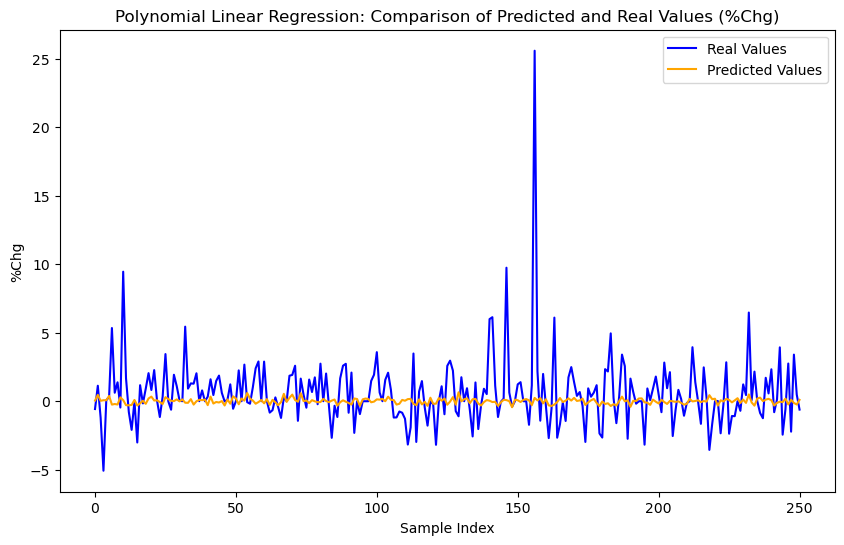

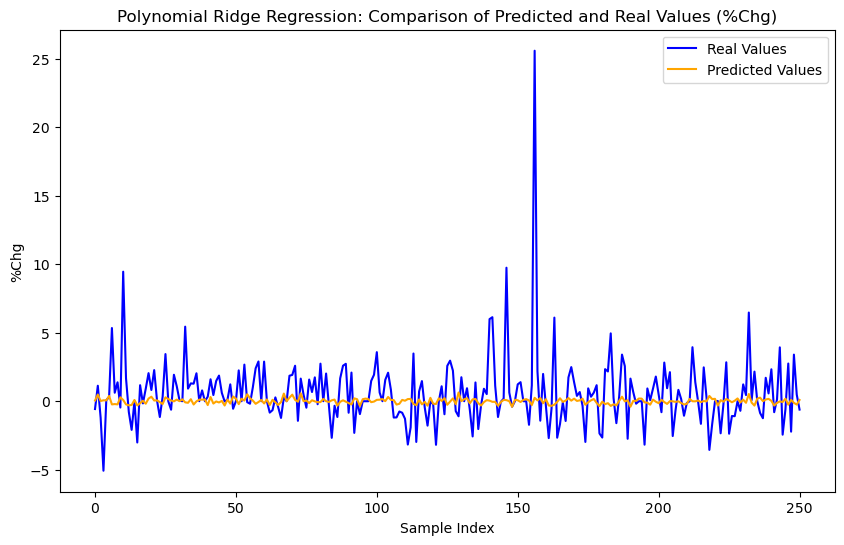

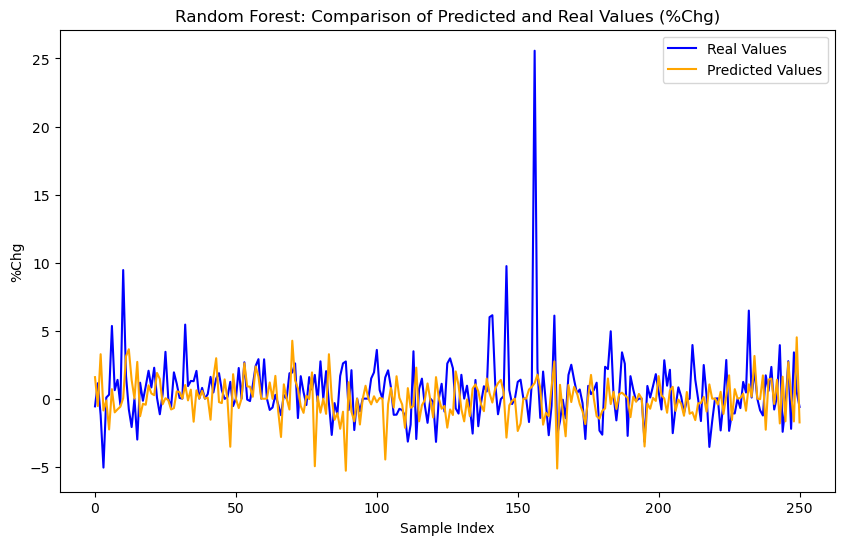

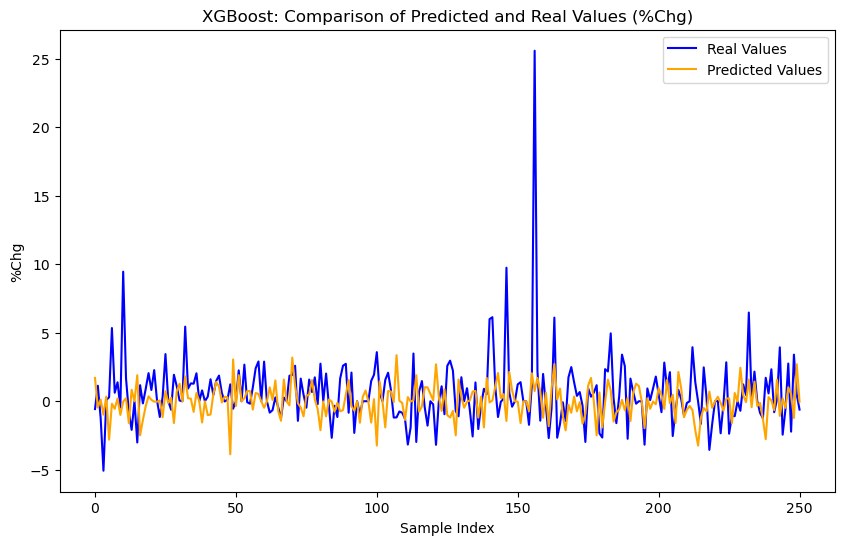

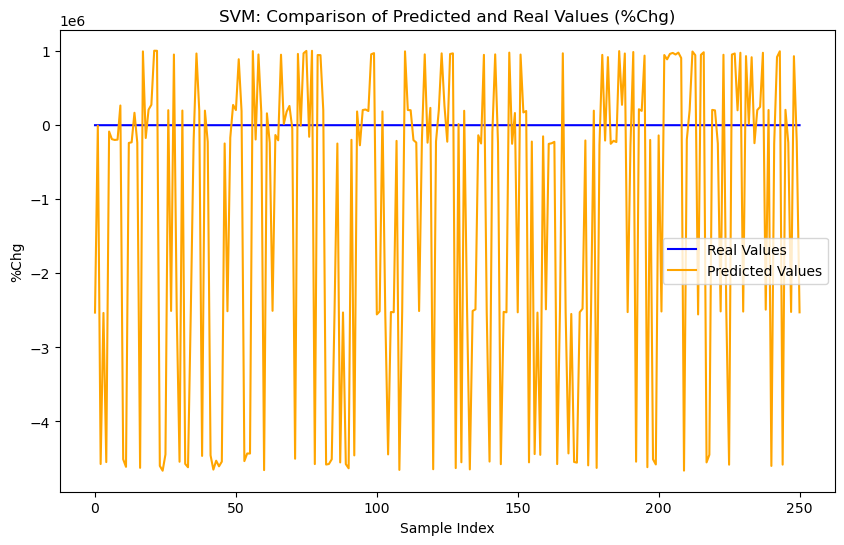

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(test_poly_pred, label='Predicted Values', color='orange')
plt.title('Polynomial Linear Regression: Comparison of Predicted and Real Values (%Chg)')
plt.xlabel('Sample Index')
plt.ylabel('%Chg')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(test_ridge_pred, label='Predicted Values', color='orange')
plt.title('Polynomial Ridge Regression: Comparison of Predicted and Real Values (%Chg)')
plt.xlabel('Sample Index')
plt.ylabel('%Chg')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(test_rf_pred, label='Predicted Values', color='orange')
plt.title('Random Forest: Comparison of Predicted and Real Values (%Chg)')
plt.xlabel('Sample Index')
plt.ylabel('%Chg')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(test_xg_pred, label='Predicted Values', color='orange')
plt.title('XGBoost: Comparison of Predicted and Real Values (%Chg)')
plt.xlabel('Sample Index')
plt.ylabel('%Chg')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(test_svm_pred, label='Predicted Values', color='orange')
plt.title('SVM: Comparison of Predicted and Real Values (%Chg)')
plt.xlabel('Sample Index')
plt.ylabel('%Chg')
plt.legend()
plt.show()

In [31]:
y

Date
2020-02-28     0.00
2020-03-02     0.00
2020-03-03     0.00
2020-03-04     0.00
2020-03-05     0.00
              ...  
2025-02-14     0.27
2025-02-18     3.36
2025-02-19    -0.70
2025-02-20   -12.45
2025-02-21    -2.56
Name: Change, Length: 1253, dtype: float64

In [33]:
# Get feature names from PolynomialFeatures
feature_names = poly.get_feature_names_out()

# Get coefficients and intercept
coefficients = poly_reg_model.coef_
intercept = poly_reg_model.intercept_

# Store in a DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Save to CSV or JSON
coef_df.to_csv('regression_coefficients.csv', index=False)
coef_df.to_json('regression_coefficients.json', orient='records')

# Print top coefficients
print(coef_df.head(10))


  Feature  Coefficient
0       1     0.000000
1      x0     0.063759
2      x1     1.478847
3      x2    -0.063679
4      x3     0.997701
5      x4    -1.475331
6      x5    13.748394
7      x6     3.348781
8      x7 -8545.518603
9      x8   -32.771514


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Convert continuous 'Change' into binary classes: Increase (1) or Decrease (0)
y_class = (y > 0).astype(int)  # 1 if Change > 0, else 0

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_class, test_size=0.2, random_state=42)

# Step 1: Fit the Random Forest Classification model
rf_class_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class_model.fit(X_train, y_train)

# Step 2: Make Predictions
train_rf_class_pred = rf_class_model.predict(X_train)
test_rf_class_pred = rf_class_model.predict(X_test)

# Step 3: Calculate Metrics
accuracy_rf = accuracy_score(y_test, test_rf_class_pred)
precision_rf = precision_score(y_test, test_rf_class_pred)
recall_rf = recall_score(y_test, test_rf_class_pred)
f1_rf = f1_score(y_test, test_rf_class_pred)
conf_matrix_rf = confusion_matrix(y_test, test_rf_class_pred)

# Step 4: Store Results
classification_results = {}
classification_results['Random Forest Classifier'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf,
    'Confusion Matrix': conf_matrix_rf.tolist()  # Convert matrix to list for JSON storage
}



In [126]:
from xgboost import XGBClassifier

# Step 1: Fit the XGBoost model
xgb_class_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_class_model.fit(X_train, y_train)

# Step 2: Predictions
train_xgb_class_pred = xgb_class_model.predict(X_train)
test_xgb_class_pred = xgb_class_model.predict(X_test)

# Step 3: Calculate metrics
accuracy_xgb = accuracy_score(y_test, test_xgb_class_pred)
precision_xgb = precision_score(y_test, test_xgb_class_pred)
recall_xgb = recall_score(y_test, test_xgb_class_pred)
f1_xgb = f1_score(y_test, test_xgb_class_pred)
conf_matrix_xgb = confusion_matrix(y_test, test_xgb_class_pred)

# Store results
classification_results['XGBoost Classifier'] = {
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1-Score': f1_xgb,
    'Confusion Matrix': conf_matrix_xgb
}

C:\Users\capod\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [128]:
print(classification_results)

{'Random Forest Classifier': {'Accuracy': 0.549800796812749, 'Precision': 0.6019417475728155, 'Recall': 0.4626865671641791, 'F1-Score': 0.5232067510548523, 'Confusion Matrix': [[76, 41], [72, 62]]}, 'XGBoost Classifier': {'Accuracy': 0.549800796812749, 'Precision': 0.5945945945945946, 'Recall': 0.4925373134328358, 'F1-Score': 0.5387755102040817, 'Confusion Matrix': array([[72, 45],
       [68, 66]], dtype=int64)}}


In [131]:
classification_results_df = pd.DataFrame(classification_results).T  # Transpose for better readability

classification_results_df

Accuracy Precision    Recall  F1-Score  \
Random Forest Classifier  0.549801  0.601942  0.462687  0.523207   
XGBoost Classifier        0.549801  0.594595  0.492537  0.538776   

                              Confusion Matrix  
Random Forest Classifier  [[76, 41], [72, 62]]  
XGBoost Classifier        [[72, 45], [68, 66]]